Notebook um eine Vorhersage zum Umsatz der Konditorei (Warengruppe_4) zu treffen. 
Dazu gibt es den:
- Trainingsdatensatz: 05.10.2013 - 31.07.2017
- Validierungsdatensatz : 01.08.2017 - 31.07.2018
- Testdatensatz: 01.08.2018 - 30.07.2019


In [1]:
#import packages for data handling and sdg regression
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor  # Stochastic Gradient Descent Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics

In [2]:
#load data
#trainigsamples
data_train = pd.read_csv('../../0_DataPreparation/00_data/Trainingsdaten_long.csv')
print(data_train.head())
print(data_train.shape)

#validation samples
data_val = pd.read_csv('../../0_DataPreparation/00_data/Validierungsdaten_long.csv')
print(data_val.head())
print(data_val.shape)

        Datum      Umsatz  Warengruppe_1  Warengruppe_2  Warengruppe_3  \
0  2013-07-01  148.828353              1              0              0   
1  2013-07-02  159.793757              1              0              0   
2  2013-07-03  111.885594              1              0              0   
3  2013-07-04  168.864941              1              0              0   
4  2013-07-05  171.280754              1              0              0   

   Warengruppe_4  Warengruppe_5  Warengruppe_6  Temp_Very_Cold  Temp_Cold  \
0              0              0              0               0          0   
1              0              0              0               0          0   
2              0              0              0               0          0   
3              0              0              0               0          0   
4              0              0              0               0          0   

   ...  Samstag  Sonntag   VPI  Number_of_ships  Ship  Heimspiel  Feiertag  \
0  ...        

In [3]:
#extract the konditorei data (warengruppe = 4)
training_data = data_train[data_train['Warengruppe_4']==1]
print(training_data.shape)

validation_data = data_val[data_val['Warengruppe_4']==1]
print(validation_data.shape)

(1409, 39)
(357, 39)


In [4]:
#extract the target variable
y_train = training_data['Umsatz']
print(y_train.head())
print(y_train.shape)
y_val = validation_data['Umsatz']

#extract the features
features = ['Warengruppe_1', 'Warengruppe_2', 'Warengruppe_3','Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6','Ship', 'is_holiday']
x_train = training_data[features]
x_val = validation_data[features]
print(x_train.head())
print(x_train.shape)

4386    65.890169
4387    74.543917
4388    69.262728
4389    61.490175
4390    86.759861
Name: Umsatz, dtype: float64
(1409,)
      Warengruppe_1  Warengruppe_2  Warengruppe_3  Warengruppe_4  \
4386              0              0              0              1   
4387              0              0              0              1   
4388              0              0              0              1   
4389              0              0              0              1   
4390              0              0              0              1   

      Warengruppe_5  Warengruppe_6  Ship  is_holiday  
4386              0              0     0           1  
4387              0              0     0           1  
4388              0              0     0           1  
4389              0              0     0           1  
4390              0              0     1           1  
(1409, 8)


In [5]:
#train the sgd regression model
# Train a Stochastic Gradient Descent (SGD) Regressor
# Parameters:
# - max_iter: Maximum number of iterations for training.
# - learning_rate: Type of learning rate schedule ('invscaling' decreases learning rate over time).
# - eta0: Initial learning rate.
sgd_model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
sgd_model.fit(x_train, y_train)

SGDRegressor(random_state=42)

In [6]:
# Make predictions on the test set
sgd_predictions = sgd_model.predict(x_val)
print("Predictions for test data:", sgd_predictions[:5])  # Display first 5 predictions

Predictions for test data: [86.65206389 86.65206389 86.65206389 86.65206389 86.65206389]


In [7]:
# Calculate error metrics
mae = mean_absolute_error(y_val, sgd_predictions)  # Mean Absolute Error
mse = mean_squared_error(y_val, sgd_predictions)  # Mean Squared Error
mape = (abs((y_val - sgd_predictions) / y_val).mean()) * 100  # Mean Absolute Percentage Error

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 20.02
Mean Squared Error (MSE): 712.79
Mean Absolute Percentage Error (MAPE): 25.90%


/tmp/ipykernel_65078/4123917379.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', color="red")


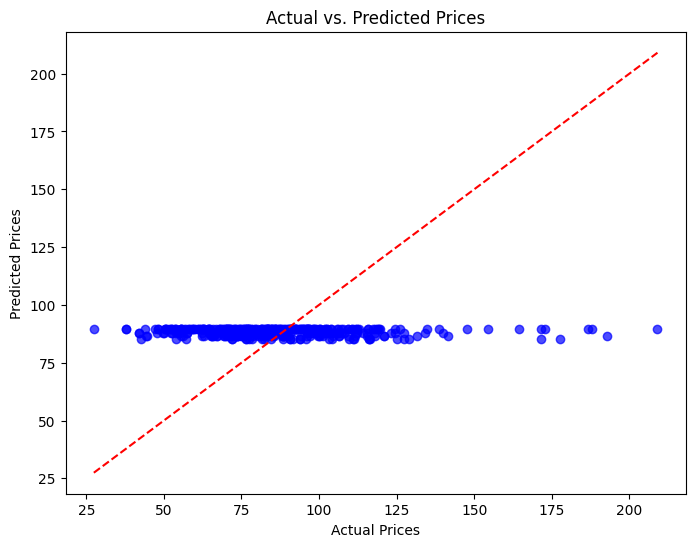

In [8]:
# Plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_val, sgd_predictions, alpha=0.7, color="blue")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()
